### Белянинов Илья ПМ22-1

# Семинар

1. Загрузите датасет ирисы Фишера из библиотеки sklearn.datasets.
2. Сделайте hold-out разбиение данных. Для этого разделите данные на обучающую и валидационную выборки и выведите на экран соответствующие индексы разбиения.
3. Теперь сделайте разбиение перемешанных данных, зафиксировав воспроизводимость выбора данных после перемешивания, указав значение параметра random_state=42 и выведите на экран соответствующие индексы разбиения.
4. Обучите модель логистической регрессии на обучающих данных. Выведите значения коэффициентов модели, полученных в результате обучения. Сделайте предсказание на тестовом наборе признаков. Выведите значение метрик accuracy и f1-score.
5. Разделите данные на обучающую и валидационную выборки по новому в соотношении 75-25. Обучите модель на этих данных, выведите значения получившихся коэффициентов модели. Выведите значения метрик и сравните их со значениями из предыдущего пункта. Сделайте вывод о том, влияет ли способ разбиения на результат.
6. Теперь сделайте k-блочную перекрёстную проверку модели (кросс-валидацию). Сравните полученные метрики с метриками, которые были при hold-out разбиении.
7. Теперь сделайте ту же самую перекрёстную проверку модели, используя библиотечную функцию cross_val_score. Убедитесь, что получится тот же результат.
8. Теперь сделайте k-блочную перекрёстную проверку модели (кросс-валидацию) со стратификацией. Проделайте всё тоже самое, что и в предыдущем пункте.
9. Теперь сделайте перекрёстную проверку, изпользуя leave-one-out разбиение. Проделайте всё тоже самое, что и в предыдущем пункте.

In [52]:
import pandas as pd
from sklearn.datasets import load_iris
import warnings

warnings.filterwarnings("ignore")

iris = load_iris()
X=iris.data
y=iris.target

In [53]:
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
name_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2:'Iris-virginica'}
iris_data['class'] = [name_map[k] for k in iris['target']]
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8260869565217391
0.7999999999999999


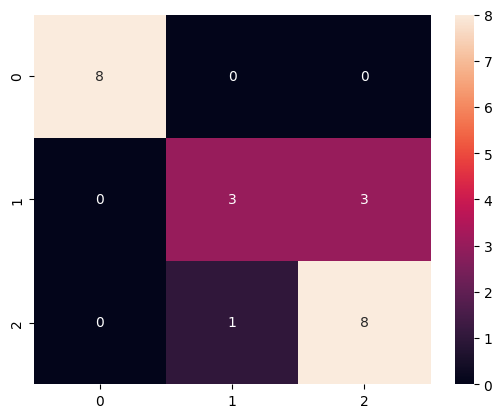

In [56]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

1.0
1.0


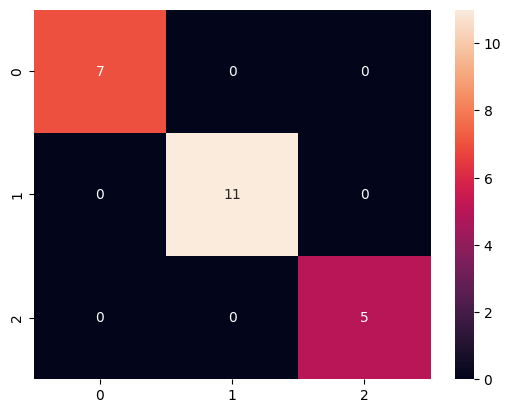

In [58]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8695652173913043
0.8745098039215686


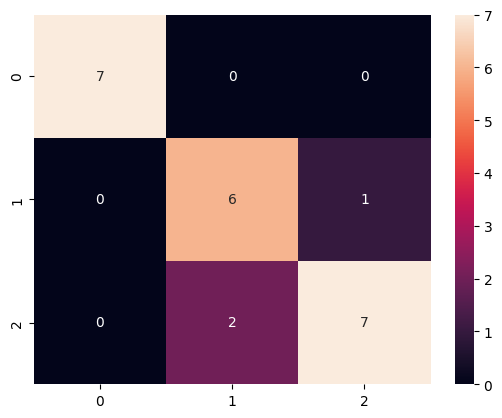

In [60]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [61]:
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut, cross_val_score

In [62]:
kf = KFold(n_splits = 3,shuffle=True, random_state=15)
kf

KFold(n_splits=3, random_state=15, shuffle=True)

In [63]:
for i, (train_index, test_index) in enumerate(kf.split(y)):
    print("Fold {}: Длинна train: {}, Длинна test: {}".format(i+1, len(train_index), len(test_index)))
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1: Длинна train: 100, Длинна test: 50
Train: index=[  1   2   3   4   7  10  14  15  16  17  18  19  22  23  24  26  28  29
  32  33  34  35  37  38  39  40  41  42  43  44  45  46  49  50  51  52
  53  54  56  60  62  63  64  65  66  68  69  70  73  75  76  77  79  80
  81  82  83  85  87  88  91  92  93  94  96  99 101 102 104 105 106 107
 108 110 111 113 114 117 118 119 120 121 123 125 128 131 132 133 134 135
 136 137 139 140 141 142 144 145 146 147]
 Test:  index=[  0   5   6   8   9  11  12  13  20  21  25  27  30  31  36  47  48  55
  57  58  59  61  67  71  72  74  78  84  86  89  90  95  97  98 100 103
 109 112 115 116 122 124 126 127 129 130 138 143 148 149]
Fold 2: Длинна train: 100, Длинна test: 50
Train: index=[  0   1   4   5   6   7   8   9  10  11  12  13  15  17  19  20  21  22
  23  24  25  26  27  28  30  31  34  36  37  39  40  41  42  44  47  48
  50  53  55  56  57  58  59  60  61  62  63  65  66  67  70  71  72  74
  75  78  79  84  85  86  89  90  95  96  97

In [64]:
metrics_accuracy = []
metrics_f1 = []
model = LogisticRegression(solver='liblinear')
for i, (train_index, test_index) in enumerate(kf.split(y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_accuracy.append(accuracy_score(y_test, y_pred))
    metrics_f1.append(f1_score(y_test, y_pred, average='macro'))

In [65]:
print('Значения метрики accuracy: {} \nЗначения метрики f1: {}'.format(metrics_accuracy, metrics_f1))

Значения метрики accuracy: [0.96, 0.96, 0.9] 
Значения метрики f1: [0.9595588235294118, 0.9629629629629629, 0.890652557319224]


In [66]:
import numpy as np
print("Среднее по кросс-валидации: ", np.array(metrics_accuracy).mean())

Среднее по кросс-валидации:  0.94


In [67]:
print("Дисперсия по кросс-валидации: ", np.array(metrics_accuracy).std())

Дисперсия по кросс-валидации:  0.028284271247461874


In [68]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = kf,                # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'accuracy',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [0.96 0.96 0.9 ]
Среднее по кросс-валидации:  0.94
Дисперсия по кросс-валидации:  0.028284271247461874


In [69]:
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=15)
skf.get_n_splits(X, y)

3

In [71]:
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  0   1   2   3   4   5   7   8   9  12  14  15  16  17  18  19  21  23
  24  25  26  28  29  31  32  36  37  38  39  40  41  44  45  51  52  53
  54  55  60  61  62  63  65  66  68  70  72  75  77  80  81  82  83  84
  85  86  87  89  90  91  93  94  95  96  97  98 101 102 103 104 105 107
 110 111 112 113 114 116 118 121 122 123 124 126 127 128 129 132 133 134
 139 140 141 142 143 144 145 146 147 149]
 Test:  index=[  6  10  11  13  20  22  27  30  33  34  35  42  43  46  47  48  49  50
  56  57  58  59  64  67  69  71  73  74  76  78  79  88  92  99 100 106
 108 109 115 117 119 120 125 130 131 135 136 137 138 148]
Fold 2:
Train: index=[  0   1   2   4   5   6   9  10  11  13  14  15  16  19  20  21  22  23
  26  27  28  29  30  31  33  34  35  42  43  46  47  48  49  50  51  54
  55  56  57  58  59  61  63  64  66  67  69  70  71  73  74  75  76  78
  79  83  84  87  88  89  90  91  92  94  96  97  99 100 101 103 105 106
 107 108 109 110 114 115 116 117 118 119 

In [72]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = skf,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1.         1.         0.92046784]
Среднее по кросс-валидации:  0.9734892787524366


In [73]:
loo = LeaveOneOut()

In [74]:
for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]
 Test:  index=[0]
Fold 2:
Train: index=[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  

In [75]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = loo,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Среднее по кросс-валидации:  0.9533333333333334


# Дополнительные задания

#### 1. Изучите разбиение Leave-P-Out. Продемонстрируйте работу этого алгоритма на примере из лабораторной работы.

In [76]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X=iris.data
y=iris.target

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [78]:
from sklearn.model_selection import LeavePOut

In [83]:
lpo = LeavePOut(2)
lpo.get_n_splits(X)

11175

In [80]:
for train_index, test_index in lpo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Выходные данные были обрезаны до нескольких последних строк (5000).
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 117 118 119 120 121 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149] TEST: [116 122]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 117 118 119 120 121 122 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 14

In [84]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = lpo,                # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'accuracy',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

KeyboardInterrupt: 

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = lpo,                # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [1. 1. 1. ... 1. 1. 1.]
Среднее по кросс-валидации:  0.9539746457867264
Дисперсия по кросс-валидации:  0.16998043885490488


#### 2. Изучите функцию cross_validate(). Продемонстрируйте работу этой функции на тех же данных.

In [85]:
from sklearn.model_selection import cross_validate

In [86]:
kf = KFold(n_splits = 5,shuffle=True, random_state=15)
kf

KFold(n_splits=5, random_state=15, shuffle=True)

In [87]:
cv_results = cross_validate(model, X, y, cv=kf)
cv_results

{'fit_time': array([0.01864004, 0.01377463, 0.00953102, 0.0110364 , 0.01144004]),
 'score_time': array([0.00073314, 0.00059152, 0.00067139, 0.00053334, 0.00068164]),
 'test_score': array([1.        , 1.        , 0.93333333, 0.93333333, 0.93333333])}

In [89]:
print(f'Среднее fit_time: {cv_results["fit_time"].mean()}')
print(f'Среднее score_time: {cv_results["score_time"].mean()}')
print(f'Среднее test_score: {cv_results["test_score"].mean()}')

Среднее fit_time: 0.012884426116943359
Среднее score_time: 0.0006422042846679687
Среднее test_score: 0.9600000000000002


In [90]:
scores = cross_validate(model, X, y, cv=kf,
                        scoring=('accuracy', 'f1_macro'),
                        return_train_score=True,
                       n_jobs=-1)
scores

{'fit_time': array([0.02290702, 0.02460742, 0.015064  , 0.01990485, 0.01567197]),
 'score_time': array([0.00271297, 0.00257015, 0.00239825, 0.00244665, 0.00140214]),
 'test_accuracy': array([1.        , 1.        , 0.93333333, 0.93333333, 0.93333333]),
 'train_accuracy': array([0.975     , 0.975     , 0.99166667, 0.99166667, 0.96666667]),
 'test_f1_macro': array([1.        , 1.        , 0.93939394, 0.9212963 , 0.92962963]),
 'train_f1_macro': array([0.97415079, 0.97496479, 0.99145159, 0.99196321, 0.96707317])}

In [91]:
print(f'Среднее fit_time: {scores["fit_time"].mean()}')
print(f'Среднее score_time: {scores["score_time"].mean()}')
print(f'Среднее test_accuracy: {scores["test_accuracy"].mean()}')
print(f'Среднее train_accuracy: {scores["train_accuracy"].mean()}')
print(f'Среднее test_f1_macro: {scores["test_f1_macro"].mean()}')
print(f'Среднее train_f1_macro: {scores["train_f1_macro"].mean()}')

Среднее fit_time: 0.019631052017211915
Среднее score_time: 0.002306032180786133
Среднее test_accuracy: 0.9600000000000002
Среднее train_accuracy: 0.9799999999999999
Среднее test_f1_macro: 0.9580639730639732
Среднее train_f1_macro: 0.9799207086944799


#### 3. Оцените при помощи кросс-валидации другие метрики эффективности для этой же модели.

In [92]:
scores = cross_validate(model, X, y, cv=kf,
            scoring=('precision_macro','recall_macro', 'roc_auc_ovr', 'balanced_accuracy'),
            n_jobs=-1)
scores

{'fit_time': array([0.02548933, 0.02428532, 0.01563573, 0.02055049, 0.01441765]),
 'score_time': array([0.0124836 , 0.00822759, 0.00771952, 0.00820851, 0.00457001]),
 'test_precision_macro': array([1.        , 1.        , 0.93939394, 0.93333333, 0.93939394]),
 'test_recall_macro': array([1.        , 1.        , 0.93939394, 0.92592593, 0.93333333]),
 'test_roc_auc_ovr': array([1.        , 1.        , 0.99362041, 1.        , 1.        ]),
 'test_balanced_accuracy': array([1.        , 1.        , 0.93939394, 0.92592593, 0.93333333])}

In [93]:
print(f'Среднее fit_time: {scores["fit_time"].mean()}')
print(f'Среднее score_time: {scores["score_time"].mean()}')
print(f'Среднее test_precision_macro: {scores["test_precision_macro"].mean()}')
print(f'Среднее test_recall_macro: {scores["test_recall_macro"].mean()}')
print(f'Среднее test_roc_auc_ovr: {scores["test_roc_auc_ovr"].mean()}')
print(f'Среднее test_balanced_accuracy: {scores["test_balanced_accuracy"].mean()}')

Среднее fit_time: 0.02007570266723633
Среднее score_time: 0.008241844177246094
Среднее test_precision_macro: 0.9624242424242425
Среднее test_recall_macro: 0.9597306397306398
Среднее test_roc_auc_ovr: 0.9987240829346092
Среднее test_balanced_accuracy: 0.9597306397306398


#### 4. Сравните кросс-валидированные результаты работы нескольких моделей на одних и тех же данных.

In [1]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [95]:
kf = KFold(n_splits = 5,shuffle=True, random_state=15)
kf

KFold(n_splits=5, random_state=15, shuffle=True)

In [96]:
log_reg_model = LogisticRegression()
svm_model = SVC()
random_forest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
naive_bayes_model = GaussianNB()
decision_tree_model = DecisionTreeClassifier()
mlp_model = MLPClassifier()

log_reg_scores = cross_validate(log_reg_model, X, y, cv=kf, scoring='accuracy')
svm_scores = cross_validate(svm_model, X, y, cv=kf, scoring='accuracy')
random_forest_scores = cross_validate(random_forest_model, X, y, cv=kf, scoring='accuracy')
knn_scores = cross_validate(knn_model, X, y, cv=kf, scoring='accuracy')
naive_bayes_scores = cross_validate(naive_bayes_model, X, y, cv=kf, scoring='accuracy')
decision_tree_scores = cross_validate(decision_tree_model, X, y, cv=kf, scoring='accuracy')
mlp_scores = cross_validate(mlp_model, X, y, cv=kf, scoring='accuracy')

print("Cross-Validation Accuracy")
print("Logistic Regression:", log_reg_scores['test_score'].mean())
print("SVM:", svm_scores['test_score'].mean())
print("Random Forest:", random_forest_scores['test_score'].mean())
print("KNN:", knn_scores['test_score'].mean())
print("Naive Bayes:", naive_bayes_scores['test_score'].mean())
print("Decision Tree:", decision_tree_scores['test_score'].mean())
print("MLP:", mlp_scores['test_score'].mean())

Cross-Validation Accuracy
Logistic Regression: 0.9600000000000002
SVM: 0.9666666666666668
Random Forest: 0.9533333333333335
KNN: 0.9400000000000001
Naive Bayes: 0.9533333333333334
Decision Tree: 0.9266666666666665
MLP: 0.96


In [97]:
print("Fit time")
print("Logistic Regression:", log_reg_scores['fit_time'].mean())
print("SVM:", svm_scores['fit_time'].mean())
print("Random Forest:", random_forest_scores['fit_time'].mean())
print("KNN:", knn_scores['fit_time'].mean())
print("Naive Bayes:", naive_bayes_scores['fit_time'].mean())
print("Decision Tree:", decision_tree_scores['fit_time'].mean())
print("MLP:", mlp_scores['fit_time'].mean())

Fit time
Logistic Regression: 0.015842914581298828
SVM: 0.0008273601531982421
Random Forest: 0.09694495201110839
KNN: 0.00046234130859375
Naive Bayes: 0.0006242752075195313
Decision Tree: 0.00046839714050292967
MLP: 0.07502007484436035


In [98]:
print("Score time")
print("Logistic Regression:", log_reg_scores['score_time'].mean())
print("SVM:", svm_scores['score_time'].mean())
print("Random Forest:", random_forest_scores['score_time'].mean())
print("KNN:", knn_scores['score_time'].mean())
print("Naive Bayes:", naive_bayes_scores['score_time'].mean())
print("Decision Tree:", decision_tree_scores['score_time'].mean())
print("MLP:", mlp_scores['score_time'].mean())

Score time
Logistic Regression: 0.0006491661071777344
SVM: 0.00047554969787597654
Random Forest: 0.004431724548339844
KNN: 0.0022556304931640623
Naive Bayes: 0.0004115104675292969
Decision Tree: 0.0003275871276855469
MLP: 0.0006412506103515625


#### 5. Повторите анализ на другом датасете: встроенном наборе данных о диабете.

In [99]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [100]:
pd.DataFrame(diabetes.data).head(5)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [101]:
pd.DataFrame(diabetes.target).head(5)

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [118]:
from sklearn.linear_model import LinearRegression

In [120]:
reg_model = LinearRegression()
log_reg_model = LogisticRegression()
svm_model = SVC()
random_forest_model = RandomForestClassifier()

reg_model_scores = cross_validate(reg_model, X, y, cv=kf, scoring='r2')
log_reg_scores = cross_validate(log_reg_model, X, y, cv=kf, scoring='r2')
svm_scores = cross_validate(svm_model, X, y, cv=kf, scoring='r2')
random_forest_scores = cross_validate(random_forest_model, X, y, cv=kf, scoring='r2')

print("Cross-Validation R^2")
print("Linear Regression:", reg_model_scores['test_score'].mean())
print("Logistic Regression:", log_reg_scores['test_score'].mean())
print("SVM:", svm_scores['test_score'].mean())
print("Random Forest:", random_forest_scores['test_score'].mean())

Cross-Validation R^2
Linear Regression: 0.48396350771455154
Logistic Regression: -0.3529269524813212
SVM: 0.015624921557119498
Random Forest: -0.01432950041293175


In [121]:
print("Fit time")
print("Linear Regression:", reg_model_scores['fit_time'].mean())
print("Logistic Regression:", log_reg_scores['fit_time'].mean())
print("SVM:", svm_scores['fit_time'].mean())
print("Random Forest:", random_forest_scores['fit_time'].mean())

Fit time
Linear Regression: 0.0013892650604248047
Logistic Regression: 0.04879150390625
SVM: 0.11554722785949707
Random Forest: 0.5045721054077148


In [122]:
print("Score time")
print("Linear Regression:", reg_model_scores['score_time'].mean())
print("Logistic Regression:", log_reg_scores['score_time'].mean())
print("SVM:", svm_scores['score_time'].mean())
print("Random Forest:", random_forest_scores['score_time'].mean())

Score time
Linear Regression: 0.0004985332489013672
Logistic Regression: 0.0006837844848632812
SVM: 0.018497180938720704
Random Forest: 0.016104745864868163


#### 6. Сделайте k-блочную перекрёстную проверку (KFold) модели логистической регрессии, предварительно стандартизировав данные. Для этого создайте конвейер с помощью make_pipeline из библиотеки sklearn.pipeline, который будет стандартизировать, а затем выполнять логистическую регрессию.

In [123]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [124]:
pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [132]:
from sklearn.metrics import mean_squared_error
scores = cross_validate(pipeline, X, y, cv=kf, scoring=('r2','neg_mean_squared_error'))
scores

{'fit_time': array([0.00272346, 0.00757766, 0.00737667, 0.00450563, 0.0051415 ]),
 'score_time': array([0.00593328, 0.00099897, 0.00307322, 0.00207329, 0.00095797]),
 'test_r2': array([0.44598008, 0.5135745 , 0.48064406, 0.52385582, 0.45576308]),
 'test_neg_mean_squared_error': array([-2880.80847366, -2982.03357613, -3150.18751143, -2924.46649562,
        -3213.37823745])}

In [134]:
print(f'Среднее fit_time: {scores["fit_time"].mean()}')
print(f'Среднее score_time: {scores["score_time"].mean()}')
print(f'Среднее test_r2: {scores["test_r2"].mean()}')
print(f'Среднее test_neg_mean_squared_error: {scores["test_neg_mean_squared_error"].mean()}')

Среднее fit_time: 0.005464982986450195
Среднее score_time: 0.0026073455810546875
Среднее test_r2: 0.4839635077145516
Среднее test_neg_mean_squared_error: -3030.1748588575806
